# 数据探索

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats


## 训练集(train.csv)探索

In [2]:
train = pd.read_csv('../data/train.csv',)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train.apply(lambda x: sum(x.isnull()))

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

在训练集中没有缺失值，因为给后续工作带来了方便。

## 变量分析

### Sales

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(train)

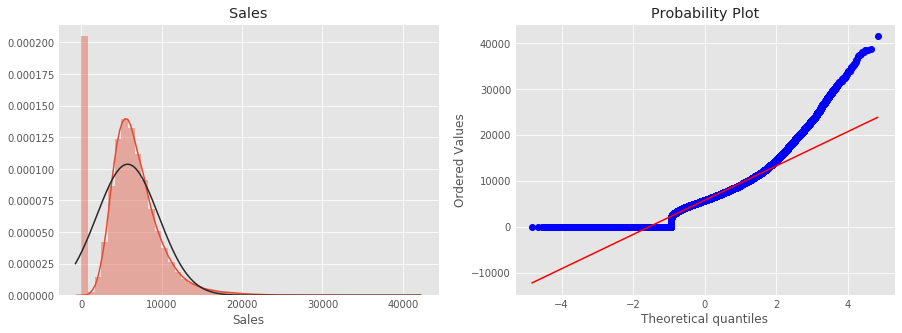

In [9]:
# 观察sales的分布
fig = plt.figure(figsize=(15,5))
_ = plt.subplot(121)
sns.distplot(train['Sales'], fit=stats.norm)
plt.title('Sales')
_ = plt.subplot(122)
res = stats.probplot((train['Sales']), plot=plt)

从上图中可以看出，在训练集中存在销售额为0的情况,并且存在大量的离群值。<br>
整体上看，销售额不是正态分布，存在明显的长尾。需要对Sales进行对数变换。

### DayOfWeek V.S. Sales

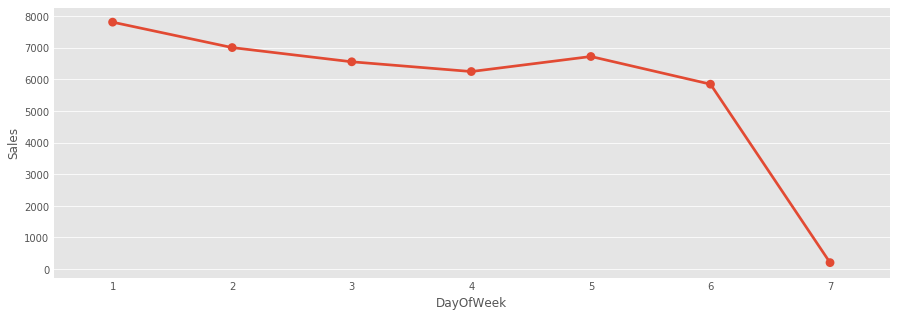

In [18]:
fig = plt.figure(figsize=(15,5))
_ = sns.pointplot(x='DayOfWeek', y='Sales', data=train)